# <font color='blue'>***Installs and Versioning***</font>
Make sure of 3 things:
- Python version 3.6.x
- We have Twint installed

In [ ]:
!python --version

Python 3.7.12


In [ ]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.6 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
!python --version

Python 3.6.9


In [ ]:
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pkg-resources python3-secretstorage python3-setuptools python3-six
  python3-wheel python3-xdg
Suggested packages:
  python-crypto-doc python-cryptography-doc python3-cryptography-vectors
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0
  python-secretstorage-doc python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pip python3-pkg-resources python3-secretstorage python3-setuptools
  python3-six python3-wheel python3-xdg
0 upgraded, 15 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,882 kB of archi

In [ ]:
!python -m pip install --upgrade pip

    100% |████████████████████████████████| 1.7MB 721kB/s 
  Found existing installation: pip 9.0.1
    Not uninstalling pip at /usr/lib/python3/dist-packages, outside environment /usr


In [ ]:
!pip3 list

Package                 Version
----------------------- ---------------
asn1crypto              0.24.0
cryptography            2.1.4
idna                    2.6
keyring                 10.6.0
keyrings.alt            3.0
pip                     21.3.1
pycrypto                2.6.1
PyGObject               3.26.1
python-apt              1.6.5+ubuntu0.7
pyxdg                   0.25
screen-resolution-extra 0.0.0
SecretStorage           2.3.1
setuptools              39.0.1
six                     1.11.0
wheel                   0.30.0
xkit                    0.0.0


In [ ]:
!python -m pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 166 kB/s            


In [ ]:
!pip3 uninstall dateutil

In [ ]:
!pip3 uninstall numpy

In [ ]:
!pip3 uninstall pandas

In [ ]:
!pip3 install twint

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.1 MB 8.6 MB/s            
     |████████████████████████████████| 97 kB 6.2 MB/s             
     |████████████████████████████████| 263 kB 65.2 MB/s            
     |████████████████████████████████| 378 kB 63.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 118 kB 59.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 9.5 MB 47.1 MB/s            
     |████████████████████████████████| 291 kB 77.6 MB/s            
     |████████████████████████████████| 159 kB 62.3 MB/s            
     |████████████████████████████████| 53 kB 2.3 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 191 kB 58.7 MB/s            
     |████████████████████████████████| 270 kB 63.7 MB/s            
     |████████████████████████████████| 149 kB 66.2 MB/s            
     |█████

In [ ]:
import twint

ModuleNotFoundError: ignored

# <font color='blue'>***Train sentiment classifier***</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install nltk
!pip install preprocessor
!pip install tweet-preprocessor

In [ ]:
import pandas as pd


ml_df = pd.read_csv('/content/drive/MyDrive/CSC 260 Final Project/data/twitter_sentiment_data.csv')
ml_df.sentiment = ml_df.sentiment.apply(lambda x: str(x))
ml_df.message = ml_df.message.apply(lambda x: str(x))
ml_df.message = ml_df.message.fillna('').apply(str)

ml_df = ml_df[~(ml_df.sentiment == '2')] #Drop news tweets
ml_df.sentiment.value_counts()

1     22962
0      7715
-1     3990
Name: sentiment, dtype: int64

In [ ]:
import preprocessor as p
#forming a separate feature for cleaned tweets

ml_df['cleaned_message'] = ml_df.message.apply(lambda x: p.clean(x))
ml_df

sentiment  ...                                    cleaned_message
0            -1  ...  climate change is an interesting hustle as it ...
1             1  ...  : Watch right here, as travels the world to ta...
2             1  ...  Fabulous! Leonardo 's film on change is brilli...
3             1  ...  : Just watched this amazing documentary by leo...
5             0  ...      Unamshow awache kujinga na iko global warming
...         ...  ...                                                ...
43936         1  ...  Global warming has negative effect on the melt...
43938         1  ...  Dear ,Yeah right. Human Mediated Climate Chang...
43939         1  ...  What will your respective parties do to preven...
43941         0  ...  : i still can$q$t believe this gif of taehyung...
43942         1  ...  The wealthy + fossil fuel Industry know climat...

[34667 rows x 4 columns]

In [ ]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

ml_df['cleaned_message'] = ml_df['cleaned_message'].astype(str).str.replace('\d+', '')
ml_df['lower_cleaned_message'] = ml_df['cleaned_message'].str.lower()


def remove_punctuation(words):
 new_words = []
 for word in words:
    new_word = re.sub(r'[^\w\s]', '', (word))
    if new_word != '':
       new_words.append(new_word)
 return new_words

lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ml_df.drop(columns=['message', 'cleaned_message'], inplace = True)

In [ ]:
import re
ml_df['no_punc'] = ml_df['lower_cleaned_message'].apply(lambda x: re.sub(r'[^\w\s]', '', (x)))
ml_df['lemm'] = ml_df['no_punc'].apply(lambda x : lemmatize_text(x))

In [ ]:
stop_words = set(stopwords.words('english'))
ml_df['lemm'] = ml_df['lemm'].apply(lambda x: [item for item in x if item not in stop_words])

ml_df.drop(columns=['tweetid', 'no_punc', 'lower_cleaned_message'], inplace = True)



In [ ]:
ml_df['lemm'] = [" ".join(word) for word in ml_df['lemm']]


In [ ]:
import numpy as np
ml_df['lemm'] = np.array([[string] for string in ml_df.lemm]).flatten()

In [ ]:
data = np.array([[string] for string in ml_df.lemm]).flatten()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
fitted = vectorizer.fit_transform(data)
vocab = vectorizer.vocabulary_
fitted
#ml_df['vectors'] = ml_df.lemm.apply(lambda x : vectorizer.transform(x))

<34667x25586 sparse matrix of type '<class 'numpy.float64'>'
	with 326963 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

X = fitted
y = ml_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,stratify=y)


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier = SVC(kernel='rbf', random_state = 1)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(classifier, X_test, y_test)  
print(classification_report(y_test, y_pred))

In [ ]:
fitted

<34667x25586 sparse matrix of type '<class 'numpy.float64'>'
	with 326963 stored elements in Compressed Sparse Row format>

<1x24385 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

# <font color='blue'>***Data Processing***</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip3 install networkx
!pip3 install pandas
!pip3 install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
'''
import pandas as pd

house_tweets = pd.read_json('/content/drive/MyDrive/CSC 260 Final Project/data/house.jsonl', lines = True)

import json 

with open('/content/drive/MyDrive/CSC 260 Final Project/data/senate.jsonl') as f:

  df = json.load(f)
'''

"\nimport pandas as pd\n\nhouse_tweets = pd.read_json('/content/drive/MyDrive/CSC 260 Final Project/data/house.jsonl', lines = True)\n\nimport json \n\nwith open('/content/drive/MyDrive/CSC 260 Final Project/data/senate.jsonl') as f:\n\n  df = json.load(f)\n"

In [ ]:
#Most efficient method of opening our files
import json 
tweets = []
for line in open('/content/drive/MyDrive/CSC 260 Final Project/data/senate.jsonl', 'r'):
    tweets.append(json.loads(line))

In [ ]:
#keywords identified by Cody et al., 2015

lit_keys = ['global', 'warming', 'climate', 'change']
len(tweets)

502212

In [ ]:
import pandas as pd
info = pd.DataFrame(columns = ['id', 'handle', 'party', 'count', 'likes', 'polarity', 'subjectivity'])
#full_text, favorite_count, screen_name, favourites_count

for tweet in tweets:
  if any(word in tweet['full_text'] for word in lit_keys):

    info = info.append({'id' : tweet['user']['id'], 'handle' : tweet['user']['screen_name'],
                        'party': 0, 'count':0, 'polarity': 0, 'subjectivity' : 0, 'likes':tweet['user']['favourites_count'],
                        'text':tweet['full_text'], 'stance' : 0,
                        }, ignore_index = True
    )

In [ ]:
#use classifier prediction here

In [ ]:
info

id  ...                                               text
0      1080870981877534720  ...  Washington is running the world’s largest busi...
1                229966028  ...  Workers are at risk of losing their profession...
2                229966028  ...  @POTUS is rightfully holding accountable the C...
3       818554054309715969  ...  2 years after the President pulled our country...
4       899978622416695297  ...  New York can—and should—be a model for the nat...
...                    ...  ...                                                ...
11186             23022687  ...  Very glad they corrected this. The interim pol...
11187             23022687  ...  The press HATED that, three months ago, we had...
11188             23022687  ...  RT @dcexaminer: "Now that we’re in the midst o...
11189             23022687  ...  Heidi and I are lifting up @BorisJohnson and h...
11190             21406834  ...  I’m concerned about reports that ICE continues...

[11191 rows x 9 columns]

In [ ]:
info['cleaned_message'] = info.text.apply(lambda x: p.clean(x))


info['cleaned_message'] = info['cleaned_message'].astype(str).str.replace('\d+', '')
info['lower_cleaned_message'] = info['cleaned_message'].str.lower()


def remove_punctuation(words):
 new_words = []
 for word in words:
    new_word = re.sub(r'[^\w\s]', '', (word))
    if new_word != '':
       new_words.append(new_word)
 return new_words

lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]


import re
info['no_punc'] = info['lower_cleaned_message'].apply(lambda x: re.sub(r'[^\w\s]', '', (x)))
info['lemm'] = info['no_punc'].apply(lambda x : lemmatize_text(x))

stop_words = set(stopwords.words('english'))
info['lemm'] = info['lemm'].apply(lambda x: [item for item in x if item not in stop_words])

#info.drop(columns=[ 'no_punc', 'lower_cleaned_message', 'cleaned_message'], inplace = True)
info['lemm'] = [" ".join(word) for word in info['lemm']]

import numpy as np
info['lemm'] = np.array([[string] for string in info.lemm]).flatten()

data = np.array([[string] for string in info.lemm]).flatten()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(decode_error="replace",vocabulary=vocab)
fitted = vectorizer.fit_transform(data)
vocab = vectorizer.vocabulary_
fitted

<11191x25586 sparse matrix of type '<class 'numpy.float64'>'
	with 162827 stored elements in Compressed Sparse Row format>

In [ ]:
fitted

<11191x14057 sparse matrix of type '<class 'numpy.int64'>'
	with 172609 stored elements in Compressed Sparse Row format>

In [ ]:
#First I need to create a sentiment score for each row, and then I can use a groupby agg func

!pip install textblob

from textblob import TextBlob



info['stance'] = classifier.predict(fitted)
info['polarity'] = info['text'].apply(lambda x: TextBlob(x).sentiment[0])
info['subjectivity'] = info['text'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
info.sort_values('handle')

id  ...                                               lemm
7300  278094476  ...  ha changed course country moving right directi...
7299  278094476  ...  ben first lady michelle obama ha right change ...
7297  278094476  ...  weapon war place street child fear going schoo...
7296  278094476  ...  standing student rightfully refuse accept gun ...
7295  278094476  ...  dismissal disturbing consider highlevel change...
...         ...  ...                                                ...
5510  172858784  ...  spirit familiar year ago thousand child skippe...
5509  172858784  ...  proud fight clean environment commonsense solu...
5518  172858784  ...  sleeping gop made big change tax bill individu...
5538  172858784  ...  nomination epa administrator doe accept basic ...
4624   81191343  ...  chili cook day away proceeds go animal society...

[11191 rows x 13 columns]

In [ ]:
info['stance'] = info['stance'].apply(lambda x : int(x))

In [ ]:
info_grouped = info.groupby('handle').agg({ 'party':'first', 'id':'first', 'likes':'sum', 'polarity':'mean', 'subjectivity':'mean', 'stance':'mean'}).reset_index()

In [ ]:
info_grouped.sort_values('stance')

handle  party  ...  subjectivity    stance
36   LamarAlexander      0  ...      0.000000  0.500000
25    GrassleyPress      0  ...      0.250000  0.500000
26         HawleyMO      0  ...      0.305341  0.692308
157  cindyhydesmith      0  ...      0.714583  0.750000
151      VoteMarsha      0  ...      0.505079  0.750000
..              ...    ...  ...           ...       ...
132   SenatorRomney      0  ...      0.275833  1.000000
140    SheldonforRI      0  ...      0.480569  1.000000
27    JeanneShaheen      0  ...      0.289236  1.000000
49    MichaelBennet      0  ...      0.313640  1.000000
176    votetimscott      0  ...      0.000000  1.000000

[177 rows x 7 columns]

In [ ]:
info_grouped.to_csv('/content/drive/MyDrive/CSC 260 Final Project/data/senate_info_stances.csv')

# <font color='blue'>***Load Curated Data***</font>

In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np

senate_info = pd.read_csv('/content/drive/MyDrive/CSC 260 Final Project/data/senate_info.csv')
senate_dict = pd.read_csv('/content/drive/MyDrive/CSC 260 Final Project/data/output.csv')
senate_ids = pd.read_csv('/content/drive/MyDrive/CSC 260 Final Project/data/senate_accounts.csv')
senate_ids.rename(columns = {'Token':'handle'}, inplace = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
senate_merged = pd.merge(senate_info, senate_ids, on = 'handle').reset_index(drop = True)
senate_merged


Unnamed: 0          handle  ...         Uid                                Link
0             0  BenCardinforMD  ...   278094476  https://twitter.com/BenCardinforMD
1             1        BenSasse  ...  1480852568        https://twitter.com/BenSasse
2             2   BernieSanders  ...   216776631   https://twitter.com/BernieSanders
3             3     BillCassidy  ...    55677432     https://twitter.com/BillCassidy
4             4   BobMenendezNJ  ...   407039290   https://twitter.com/BobMenendezNJ
..          ...             ...  ...         ...                                 ...
167         172        stabenow  ...    20113797        https://twitter.com/stabenow
168         173    tammybaldwin  ...    87510313    https://twitter.com/tammybaldwin
169         174         tedcruz  ...    23022687         https://twitter.com/tedcruz
170         175        timkaine  ...   172858784        https://twitter.com/timkaine
171         176    votetimscott  ...    81191343    https://twitter.com/votetimscott

[172 rows x 8 columns]

In [ ]:
senate_dict

292495654                                                 []
0    3.252314e+08                                                 []
1    2.853794e+09                                                 []
2    4.355007e+08  [  15808765  150078976  970207298  476256944 1...
3    2.659442e+07  [  15808765  150078976  970207298  476256944 1...
4    2.941264e+08  [  15808765  150078976  970207298  476256944 1...
..            ...                                                ...
178  1.080960e+18  [           15808765           150078976      ...
179  3.398229e+08  [           15808765           150078976      ...
180  2.054654e+07  [           15808765           150078976      ...
181  1.148760e+18  [           15808765           150078976      ...
182  1.200450e+18  [           15808765           150078976      ...

[183 rows x 2 columns]

In [43]:
strlist = senate_dict.loc[2][1]
strlist = strlist.replace(" ", ',')
res = strlist.strip('][').split(',')


new_dict = {}

for i in range(len(senate_dict)):

  temp_list = []
  strlist = senate_dict.loc[i][1]
  strlist = strlist.replace(" ", ',')
  res = strlist.strip('][').split(',')

  for obj in res:
    if len(obj) > 2:
      temp_list.append(int(float(obj)))

  id_key = senate_dict.loc[i][0]

  new_dict[id_key] = temp_list

print(len(new_dict.keys()))

183


# <font color='blue'>***Network Modeling***</font>

{'political': 'test'}
nodes:  ['dtrump', 'jbiden', 'hclinton']
edges:  [('dtrump', 'hclinton'), ('dtrump', 'jbiden'), ('jbiden', 'hclinton')]


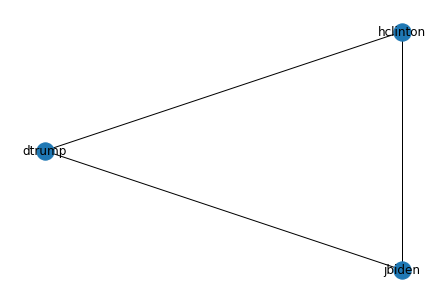

In [44]:
#Example network https://networkx.org/documentation/stable/auto_examples/index.html
import pandas as pd
import networkx as nx

df = pd.read_excel('/content/drive/MyDrive/CSC 260 Final Project/fake_twitter_data.xlsx')
g = nx.Graph(political = 'test')

print(g.graph)

for i in df.handle:
    g.add_node(i)
    
print('nodes: ', g.nodes)

g.add_edge('dtrump', 'hclinton')
g.add_edge('dtrump', 'jbiden')

g.add_edge('hclinton', 'jbiden')
g.add_edge('hclinton', 'dtrump')

g.add_edge('jbiden', 'dtrump')

print('edges: ', g.edges)

nx.draw_shell(g, with_labels = True)

In [45]:
g = nx.Graph(graph = 'Senate Twitter') #create graph

for idx, row in senate_merged.iterrows(): #iterate over each senator in our df, and store info to the node

  if row.party == 0:
    g.add_node(row.handle, party = 'D', count = row.likes, p = row.polarity, s = row.subjectivity)
  elif row.party == 1:
    g.add_node(row.handle, party = 'R', count = row.likes, p = row.polarity, s = row.subjectivity)
  else: 
    g.add_node(row.handle, party = 'I', count = row.likes, p = row.polarity, s = row.subjectivity)
    
print(g.nodes)

['BenCardinforMD', 'BenSasse', 'BernieSanders', 'BillCassidy', 'BobMenendezNJ', 'Bob_Casey', 'Boozman4AR', 'BurrForSenate', 'CapitoforWV', 'ChrisCoons', 'ChrisMurphyCT', 'ChrisVanHollen', 'ChuckGrassley', 'CoryBooker', 'CoryGardner', 'DanSullivan_AK', 'DebFischerNE', 'DianneFeinstein', 'DickDurbin', 'DougJones', 'DrRandPaul', 'EdMarkey', 'GaryPeters', 'GrahamBlog', 'GrassleyPress', 'HawleyMO', 'JeanneShaheen', 'JeffMerkley', 'JerryMoran', 'JimInhofe', 'JoeManchinWV', 'JohnBoozman', 'JohnCornyn', 'JohnnyIsakson', 'KamalaHarris', 'LamarAlexander', 'LindseyGrahamSC', 'LisaForSenate', 'Maggie_Hassan', 'MariaCantwell', 'MarkWarner', 'MarkWarnerVA', 'MarshaBlackburn', 'MarthaMcSally', 'MartinHeinrich', 'McConnellPress', 'MichaelBennet', 'MikeCrapo', 'MittRomney', 'MurrayCampaign', 'PatRoberts', 'PatToomey', 'PattyMurray', 'Perduesenate', 'RandPaul', 'RogerWicker', 'RonJohnsonWI', 'RonWyden', 'RosenforNevada', 'RoyBlunt', 'RoyBluntMO', 'ScottforFlorida', 'SenAlexander', 'SenAmyKlobuchar', 'Se

In [46]:
def handle_finder(x): #Helper function for below cell
  for idx, row in senate_merged.iterrows():
    if x == row.Uid:
      return row.handle

# would it be faster to create a dictionary of Uid : handle? I'm not sure how time efficient it is, albeit that it only takes 3 minutes...
# gonna try this out. will take some time obviously to set up to iterate through the DF, but at least it only needs to do so once.
# space complexity of O(N) where N is the amount of senators in list.
handleLookUp = {}

# seems to be okay? Check later, but this DRAMATICALLY shifts down the amount of time taken.
for idx, row in senate_merged.iterrows():
  handleLookUp[row.Uid] = row.handle

In [47]:
list_of_senate_ids = list(senate_merged['Uid']) #domain list for checking

for idx, row in senate_merged.iterrows(): #Iterate over senate df, add edge for every senator 'friendship'
  try:
    for follower_id in new_dict[row.Uid]:
      if follower_id in list_of_senate_ids:
        
        # g.add_edge(row.handle, handle_finder(follower_id))
        g.add_edge(row.handle, handleLookUp[follower_id])

  except:
    pass


In [48]:

isolates = list(nx.isolates(g)) #Find list of isolates(no edges) to remove for scaling reasons. I believe isolates are just errors in the processing part. There are about 3-5
senate_merged = senate_merged[~senate_merged['handle'].isin(isolates)]
g.remove_nodes_from(list(nx.isolates(g)))

In [49]:
#Create color mapping. parameters passed into the draw function need to be the same order as the nodes
color_map = []
for node in g:

  if g.nodes[node]['party'] == 'D':
      color_map.append('blue')
  elif g.nodes[node]['party'] == 'R': 
      color_map.append('red') 
  else: 
      color_map.append('green') 

In [50]:
# creating a smaller graph; copy of the 'g' graph so i can figure out how to work with a smaller scale...
gLotOfLikes = nx.Graph(graph="Senate Twitter 2 EBoo")

# it's a shallow copy. THAT's why it won't work... I think? It passes over a reference TO The object, not an actual copy of the node.
for node in g:
  if g.nodes[node]['count'] >= 20000:
    tempNode = node
    gLotOfLikes.add_node(tempNode)

print(len(gLotOfLikes.nodes))
for idx, row in senate_merged.iterrows(): #Iterate over senate df, add edge for every senator 'friendship'
  try:
    for follower_id in new_dict[row.Uid]:
      if follower_id in list_of_senate_ids:
        
        gLotOfLikes.add_edge(row.handle, handleLookUp[follower_id])

  except:
    pass

71


In [51]:
# how did this go back up to 169 lmao.
print(len(gLotOfLikes.nodes))
print(gLotOfLikes.nodes["BernieSanders"])
print(gLotOfLikes['BenSasse'])

169
{}
{'BenCardinforMD': {}, 'CoryBooker': {}, 'ChrisMurphyCT': {}, 'SenWarren': {}, 'SenFeinstein': {}, 'SenatorRisch': {}, 'SenatorBaldwin': {}, 'maziehirono': {}, 'SenatorTimScott': {}, 'DebFischerNE': {}, 'tedcruz': {}, 'SenJohnBarrasso': {}, 'SenatorCardin': {}, 'ChrisCoons': {}, 'SenatorCarper': {}, 'Perduesenate': {}, 'SenatorIsakson': {}, 'SenRubioPress': {}, 'SenDanSullivan': {}, 'SenTomCotton': {}, 'SenJoniErnst': {}, 'TinaSmithMN': {}, 'tammybaldwin': {}, 'brianschatz': {}, 'DougJones': {}, 'JeanneShaheen': {}, 'stabenow': {}, 'SenDuckworth': {}, 'SenatorCantwell': {}, 'SenWhitehouse': {}, 'SenJackReed': {}, 'SenBobCasey': {}, 'RonWyden': {}, 'SenSherrodBrown': {}, 'MartinHeinrich': {}, 'SenatorHassan': {}, 'SenatorShaheen': {}, 'SenatorTester': {}, 'SenGaryPeters': {}, 'SenMarkey': {}, 'MarthaMcSally': {}, 'BillCassidy': {}, 'JimInhofe': {}, 'SenKevinCramer': {}, 'SenHydeSmith': {}, 'ChrisVanHollen': {}, 'SenBillCassidy': {}, 'SenHawleyPress': {}, 'SenatorBraun': {}, 'SenR

In [52]:
alpha_map = []
for node in gLotOfLikes:
  resultantValue = (abs(g.nodes[node]['p']) * abs(g.nodes[node]['s']) * 10 + 0.1)
  if resultantValue > 1:
    resultantValue = float(1.0)
  if resultantValue < 0:
    resultantValue = float(0.1)
  if type(resultantValue) != float:
    print('no')
  alpha_map.append(resultantValue)

print(len(gLotOfLikes))
print(len(alpha_map))

169
169


TypeError: ignored

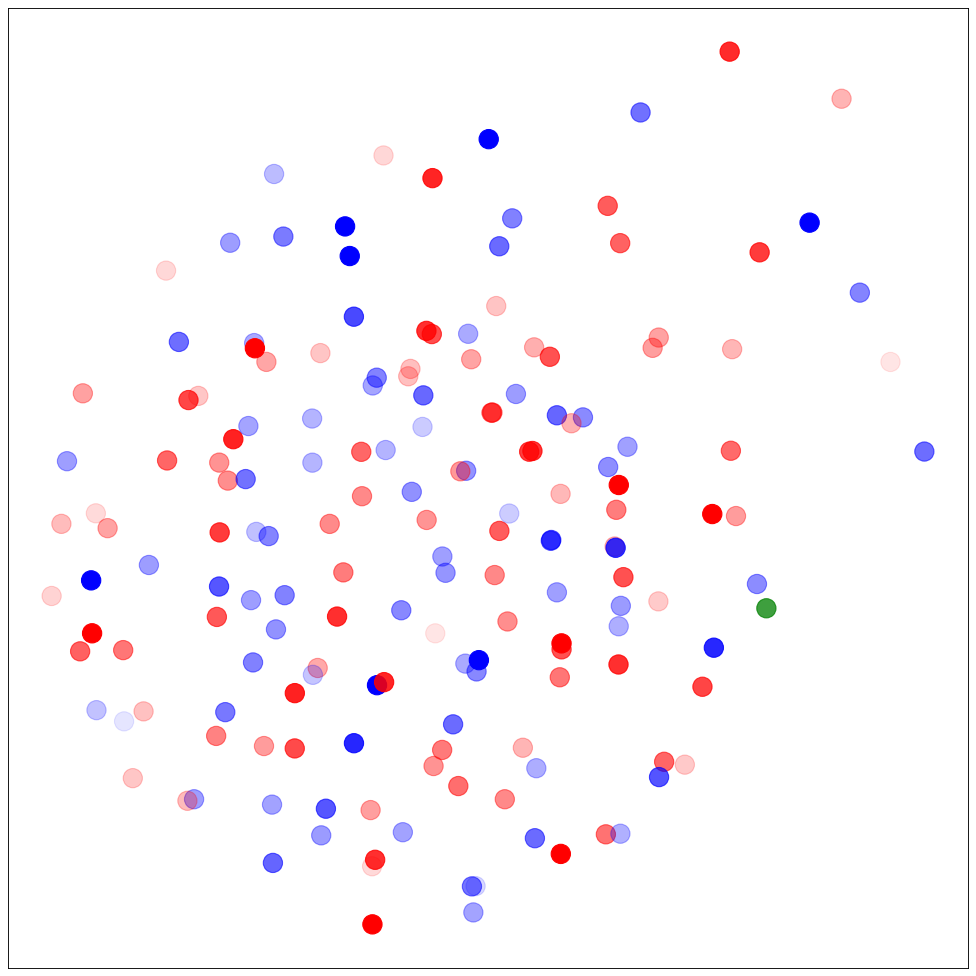

In [53]:
# creating a smaller version of the graph, it's a LITTLE more legible? I'm gonna see if I can colour the edges...
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12), dpi = 80) 
# pos = nx.fruchterman_reingold_layout(gLotOfLikes, k=4, scale=200, seed=101)
# iterate through list of nodes, use nx.draw_nodes. IF democrat, go with triangle, republicans, go with square...
# for node in nodeList...
  # if nodeDict[node]["party"] == "D":
  # nx.draw(AKWLEJKAWJEA)
  # else:
  # nx.draw(AWJEIAWJIOJEI)
pos = nx.kamada_kawai_layout(gLotOfLikes, scale=200)
#pos = nx.nx_pydot.pydot_layout(g, prog='dot')
nx.draw(gLotOfLikes,  node_color=color_map, with_labels=True, width = 0.05, alpha=alpha_map)
#nx.draw(gLotOfLikes,  node_color=color_map, with_labels=True, width = 0.05)

plt.show()

In [ ]:
print(len(g.nodes))

169


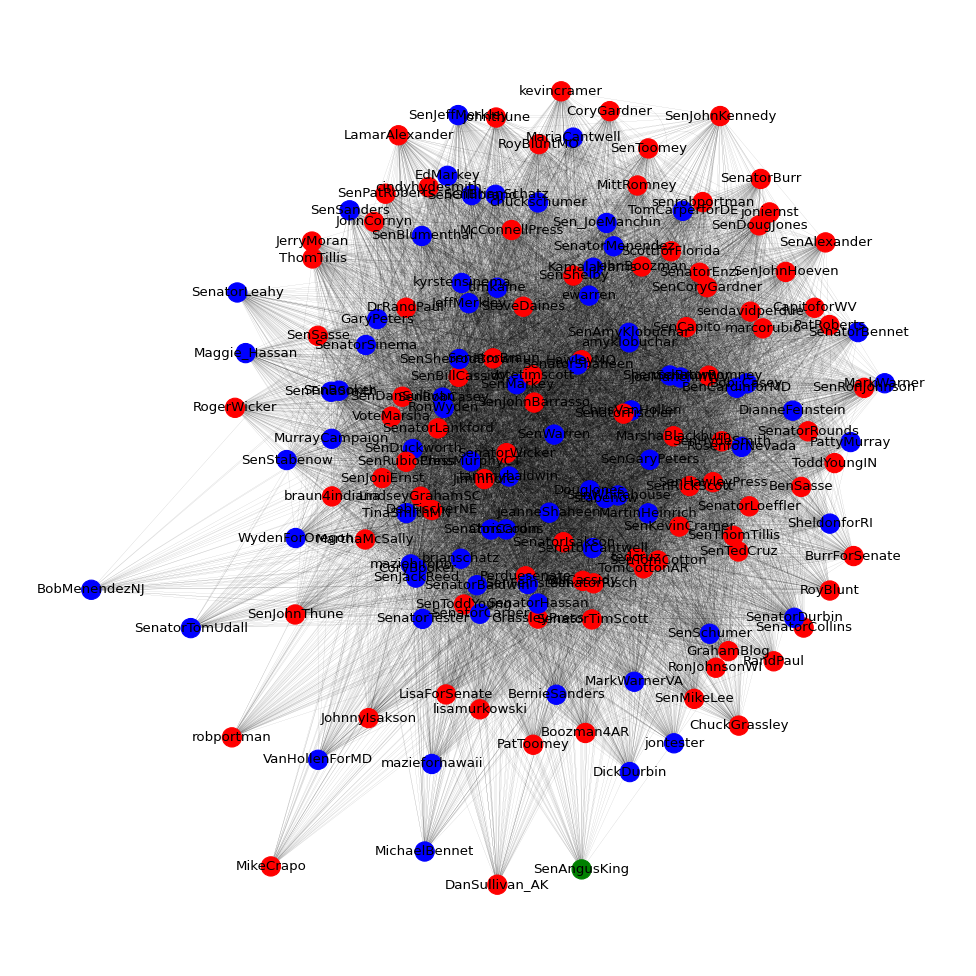

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12), dpi = 80) 
pos = nx.fruchterman_reingold_layout(g, k=4, scale=200, seed=101)
#pos = nx.nx_pydot.pydot_layout(g, prog='dot')
nx.draw(g,  node_color=color_map, with_labels=True, width = 0.05)
plt.show()

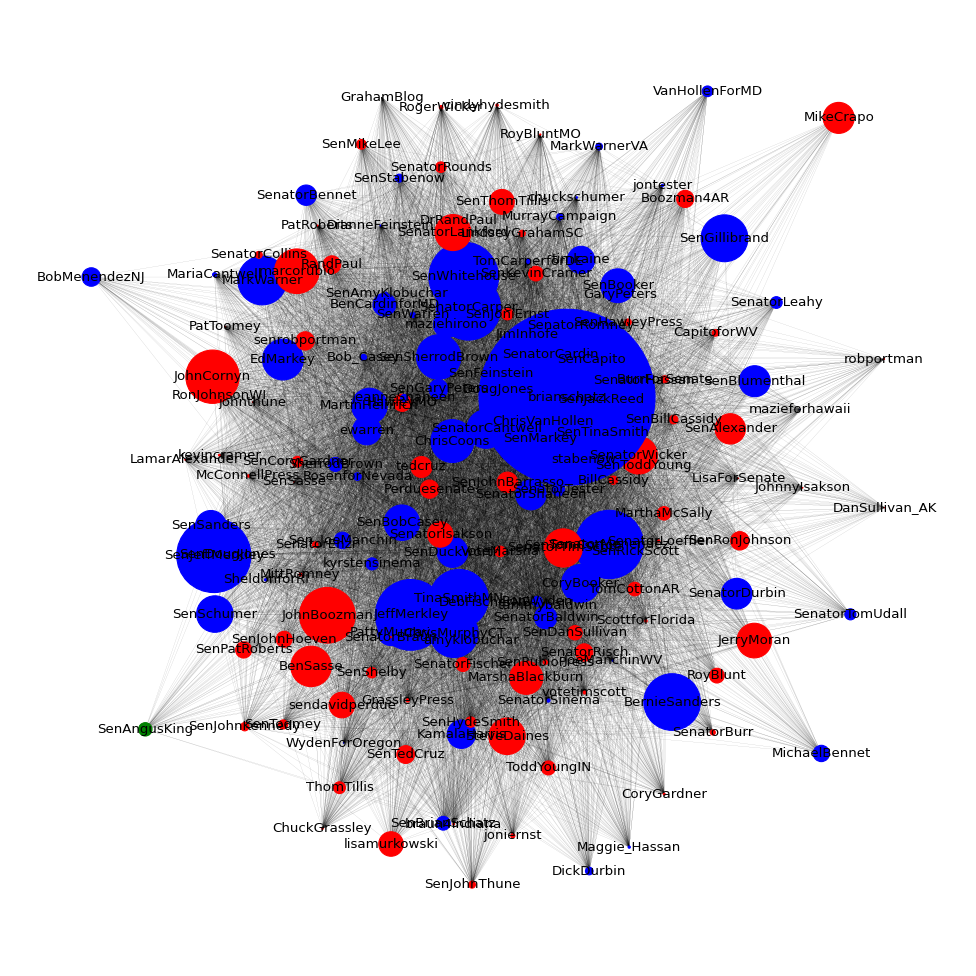

In [ ]:
node_sizes = []

for idx, row in senate_merged.iterrows(): #This code is used to create a list to pass through the draw function. The network is indexed and the parameters need to match that index, so node_list[0] = color_list[0]
  #Scaling needed
  #size = row.subjectivity*1000
  #size = row.polarity*10000
  size = int(row.likes)/100
  
  node_sizes.append(size)

plt.figure(figsize=(12,12), dpi = 80) 
nx.draw(g, node_size = node_sizes, node_color=color_map, with_labels=True, width = 0.05)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:743: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


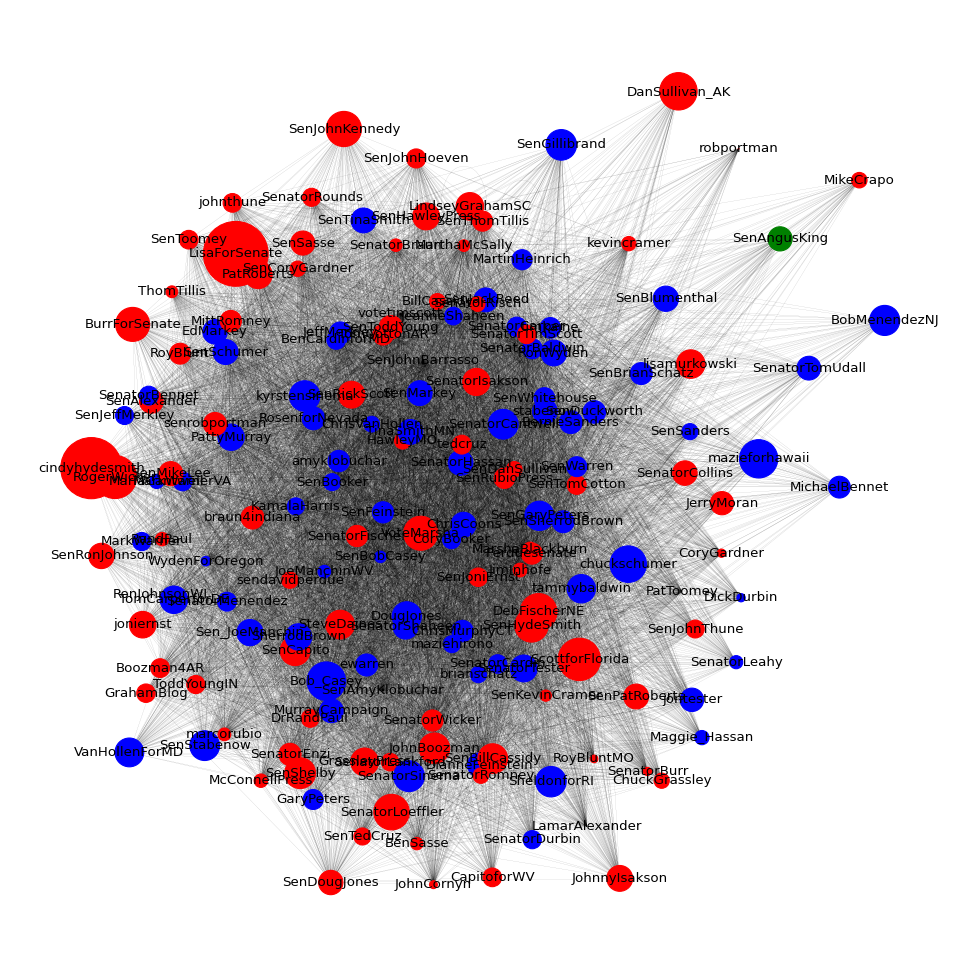

In [ ]:
'''
shape_map = []
for node in g:

  if g.nodes[node]['party'] == 'D':
      shape_map.append('o')
  elif g.nodes[node]['party'] == 'R': 
      shape_map.append('s') 
  else: 
      shape_map.append('c')
'''

node_sizes = []

for idx, row in senate_merged.iterrows(): #This code is used to create a list to pass through the draw function. The network is indexed and the parameters need to match that index, so node_list[0] = color_list[0]
  #Scaling needed
  #size = np.exp(row.subjectivity*12) #Use subjectivity, weird scaling, sentiment by size may not be the best config
  #size = np.exp(row.polarity*15) #Use polarity
  #size = int(row.likes)/100 #Use likes
  size = row.polarity*row.subjectivity * 10000
  node_sizes.append(size)

plt.figure(figsize=(12,12), dpi = 80) 
pos = nx.fruchterman_reingold_layout(g, k=4, scale=500, seed=101)

nx.draw(g, node_size = node_sizes, with_labels=True, width = 0.05, node_color = color_map)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:743: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


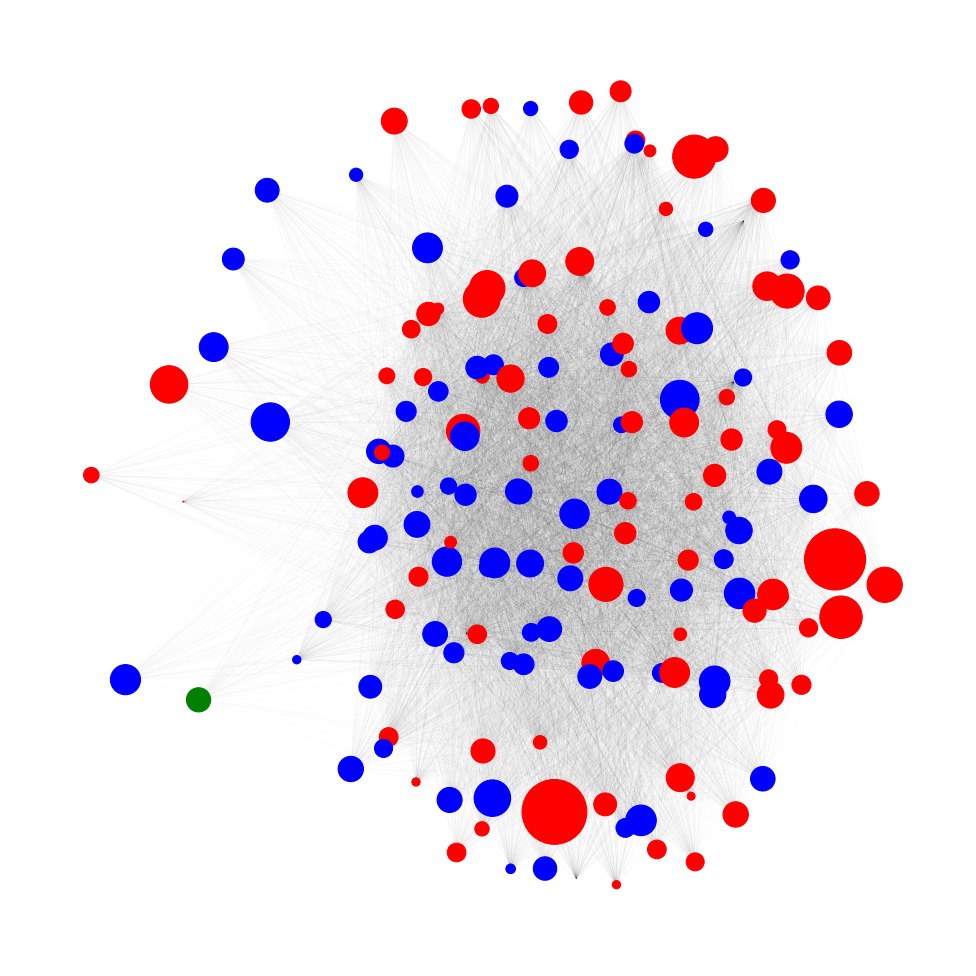

In [ ]:
node_sizes = []

for idx, row in senate_merged.iterrows(): #This code is used to create a list to pass through the draw function. The network is indexed and the parameters need to match that index, so node_list[0] = color_list[0]
  #Scaling needed
  #size = np.exp(row.subjectivity*12) #Use subjectivity, weird scaling, sentiment by size may not be the best config
  #size = np.exp(row.polarity*15) #Use polarity
  #size = int(row.likes)/100 #Use likes
  size = row.polarity*row.subjectivity * 10000
  node_sizes.append(size)

plt.figure(figsize=(12,12), dpi = 80) 
pos = nx.fruchterman_reingold_layout(g, k=4, scale=500, seed=101)

nx.draw(g, node_size = node_sizes, width = 0.01, node_color = color_map)
plt.show()

['BenCardinforMD', 'BenSasse', 'BernieSanders', 'BillCassidy', 'BobMenendezNJ', 'Bob_Casey', 'Boozman4AR', 'BurrForSenate', 'CapitoforWV', 'ChrisCoons', 'ChrisMurphyCT', 'ChrisVanHollen', 'ChuckGrassley', 'CoryBooker', 'CoryGardner', 'DanSullivan_AK', 'DebFischerNE', 'DianneFeinstein', 'DickDurbin', 'DougJones', 'DrRandPaul', 'EdMarkey', 'GaryPeters', 'GrahamBlog', 'GrassleyPress', 'HawleyMO', 'JeanneShaheen', 'JeffMerkley', 'JerryMoran', 'JimInhofe', 'JoeManchinWV', 'JohnBoozman', 'JohnCornyn', 'JohnnyIsakson', 'KamalaHarris', 'LamarAlexander', 'LindseyGrahamSC', 'LisaForSenate', 'Maggie_Hassan', 'MariaCantwell', 'MarkWarner', 'MarkWarnerVA', 'MarshaBlackburn', 'MarthaMcSally', 'MartinHeinrich', 'McConnellPress', 'MichaelBennet', 'MikeCrapo', 'MittRomney', 'MurrayCampaign', 'PatRoberts', 'PatToomey', 'PattyMurray', 'Perduesenate', 'RandPaul', 'RogerWicker', 'RonJohnsonWI', 'RonWyden', 'RosenforNevada', 'RoyBlunt', 'RoyBluntMO', 'ScottforFlorida', 'SenAlexander', 'SenAmyKlobuchar', 'Se

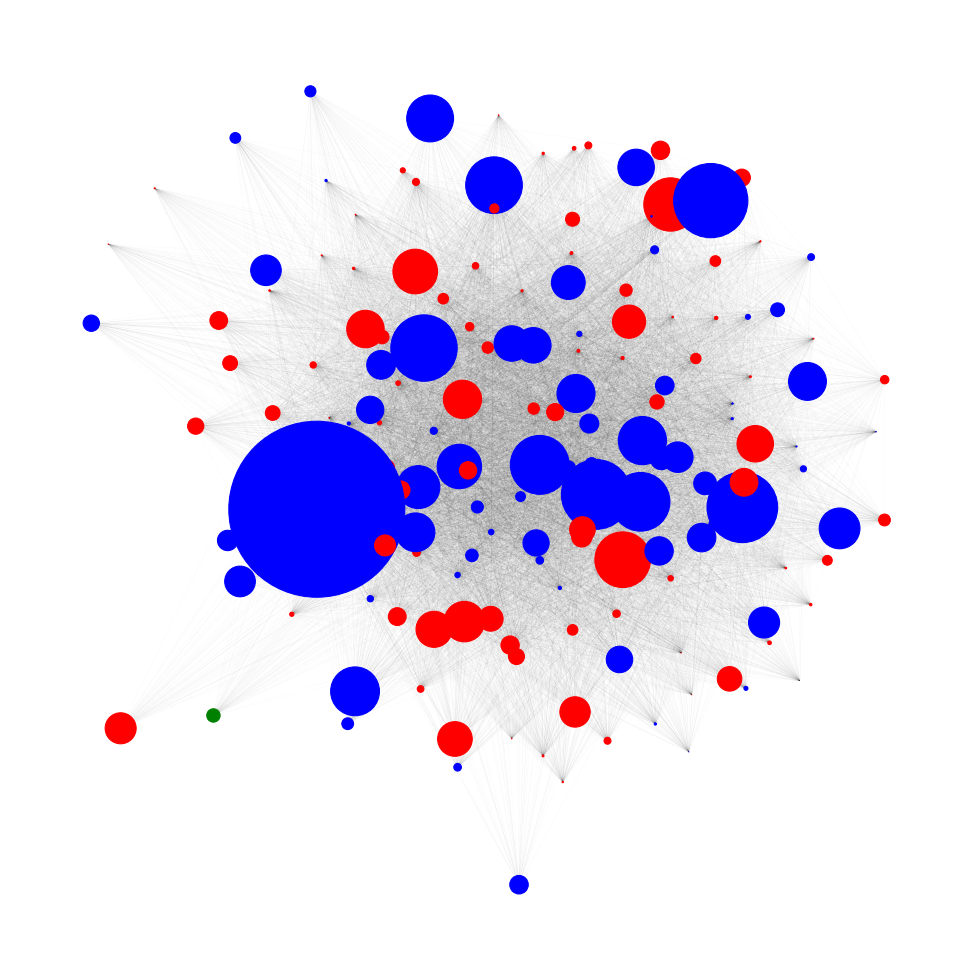

In [ ]:
p_senate_info = pd.read_csv('/content/drive/MyDrive/CSC 260 Final Project/data/personal_senate_info.csv')

p_senate_merged = pd.merge(senate_info, senate_ids, on = 'handle').reset_index(drop = True)
p_senate_merged

g = nx.Graph(graph = 'Personal Senate Twitter') #create graph

for idx, row in p_senate_merged.iterrows(): #iterate over each senator in our df, and store info to the node

  if row.party == 0:
    g.add_node(row.handle, party = 'D', count = row.likes, p = row.polarity, s = row.subjectivity)
  elif row.party == 1:
    g.add_node(row.handle, party = 'R', count = row.likes, p = row.polarity, s = row.subjectivity)
  else: 
    g.add_node(row.handle, party = 'I', count = row.likes, p = row.polarity, s = row.subjectivity)
    
print(g.nodes)

handleLookUp = {}

for idx, row in p_senate_merged.iterrows():
  handleLookUp[row.Uid] = row.handle

list_of_senate_ids = list(p_senate_merged['Uid']) #domain list for checking

for idx, row in p_senate_merged.iterrows(): #Iterate over senate df, add edge for every senator 'friendship'
  try:
    for follower_id in new_dict[row.Uid]:
      if follower_id in list_of_senate_ids:
        
        # g.add_edge(row.handle, handle_finder(follower_id))
        g.add_edge(row.handle, handleLookUp[follower_id])

  except:
    pass


isolates = list(nx.isolates(g)) #Find list of isolates(no edges) to remove for scaling reasons. I believe isolates are just errors in the processing part. There are about 3-5
p_senate_merged = p_senate_merged[~p_senate_merged['handle'].isin(isolates)]
g.remove_nodes_from(list(nx.isolates(g)))

color_map = []
for node in g:

  if g.nodes[node]['party'] == 'D':
      color_map.append('blue')
  elif g.nodes[node]['party'] == 'R': 
      color_map.append('red') 
  else: 
      color_map.append('green') 


node_sizes = []

for idx, row in p_senate_merged.iterrows(): #This code is used to create a list to pass through the draw function. The network is indexed and the parameters need to match that index, so node_list[0] = color_list[0]
  #Scaling needed
  #size = np.exp(row.subjectivity*12) #Use subjectivity, weird scaling, sentiment by size may not be the best config
  #size = np.exp(row.polarity*15) #Use polarity
  size = int(row.likes)/100 #Use likes
  #size = row.polarity*row.subjectivity * 10000
  node_sizes.append(size)

plt.figure(figsize=(12,12), dpi = 80) 
pos = nx.fruchterman_reingold_layout(g, k=1, scale=500, seed=101)

nx.draw(g, node_size = node_sizes, width = 0.01, node_color = color_map)
plt.show()

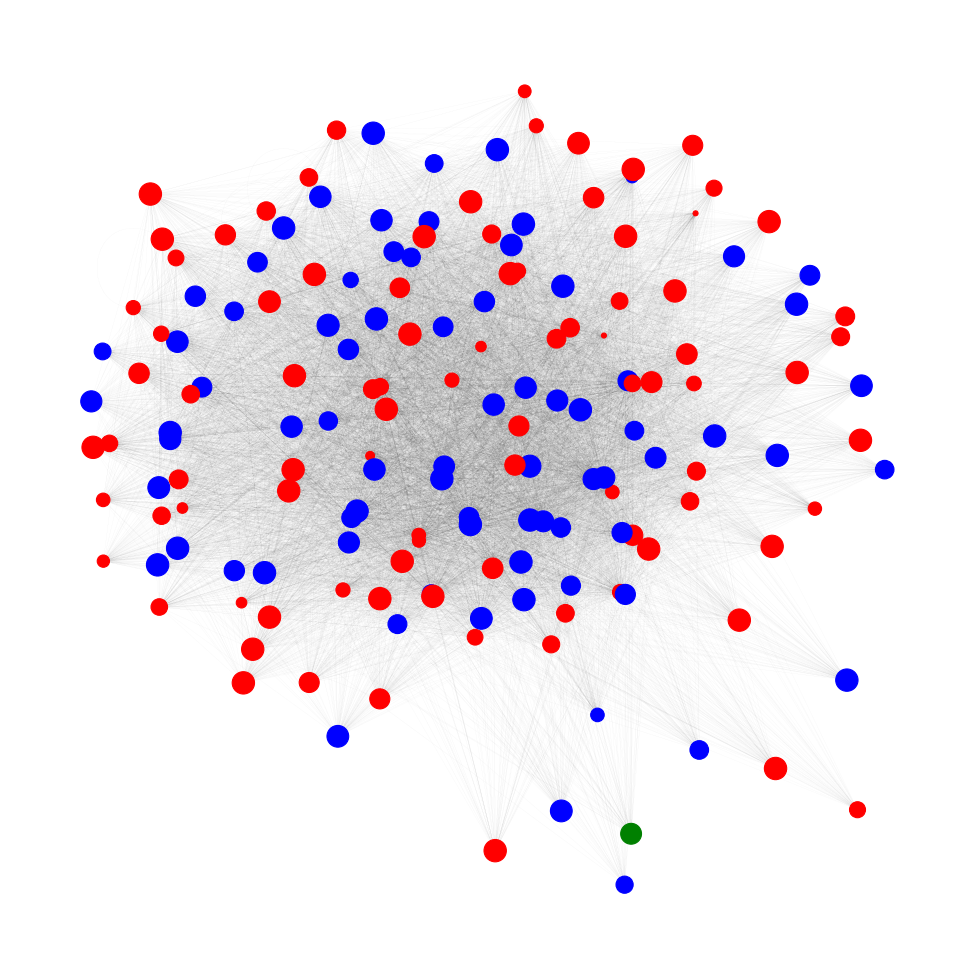

In [55]:
stancesdf = pd.read_csv('/content/drive/MyDrive/CSC 260 Final Project/data/senate_info_stances.csv')
import networkx as nx
import matplotlib.pyplot as plt


p_senate_merged = pd.merge(stancesdf, senate_ids, on = 'handle').reset_index(drop = True)
p_senate_merged

g = nx.Graph(graph = 'Personal Stances Senate Twitter') #create graph

for idx, row in p_senate_merged.iterrows(): #iterate over each senator in our df, and store info to the node

  if row.party == 0:
    g.add_node(row.handle, party = 'D', count = row.likes, p = row.polarity, s = row.subjectivity)
  elif row.party == 1:
    g.add_node(row.handle, party = 'R', count = row.likes, p = row.polarity, s = row.subjectivity)
  else: 
    g.add_node(row.handle, party = 'I', count = row.likes, p = row.polarity, s = row.subjectivity)
    

handleLookUp = {}

for idx, row in p_senate_merged.iterrows():
  handleLookUp[row.Uid] = row.handle

list_of_senate_ids = list(p_senate_merged['Uid']) #domain list for checking

for idx, row in p_senate_merged.iterrows(): #Iterate over senate df, add edge for every senator 'friendship'
  try:
    for follower_id in new_dict[row.Uid]:
      if follower_id in list_of_senate_ids:
        
        # g.add_edge(row.handle, handle_finder(follower_id))
        g.add_edge(row.handle, handleLookUp[follower_id])

  except:
    pass


isolates = list(nx.isolates(g)) #Find list of isolates(no edges) to remove for scaling reasons. I believe isolates are just errors in the processing part. There are about 3-5
p_senate_merged = p_senate_merged[~p_senate_merged['handle'].isin(isolates)]
g.remove_nodes_from(list(nx.isolates(g)))

color_map = []
for node in g:

  if g.nodes[node]['party'] == 'D':
      color_map.append('blue')
  elif g.nodes[node]['party'] == 'R': 
      color_map.append('red') 
  else: 
      color_map.append('green') 


node_sizes = []

for idx, row in p_senate_merged.iterrows(): #This code is used to create a list to pass through the draw function. The network is indexed and the parameters need to match that index, so node_list[0] = color_list[0]
  #Scaling needed
  #size = np.exp(row.subjectivity*12) #Use subjectivity, weird scaling, sentiment by size may not be the best config
  #size = np.exp(row.polarity*15) #Use polarity
  #size = int(row.likes)/100 #Use likes
  #size = row.polarity*row.subjectivity * 10000
  size = np.exp(row.stance*6)
  node_sizes.append(size)


plt.figure(figsize=(12,12), dpi = 80) 
pos = nx.fruchterman_reingold_layout(g, k=1, scale=500, seed=101)

nx.draw(g, node_size = node_sizes, width = 0.01, node_color = color_map)
plt.show()

# <font color='blue'>***Results***</font>

In [ ]:
nx.info(g)

In [34]:
print(senate_merged[senate_merged.party == 0].polarity.mean() ) #Average Democrat polarity 
print(senate_merged[senate_merged.party == 1].polarity.mean() ) #Average republican polarity

print(senate_merged[senate_merged.party == 0].subjectivity.mean() ) #Average democrat subj
print(senate_merged[senate_merged.party == 1].subjectivity.mean() ) #Average republican subj



0.11031325119737494
0.11673588054300002
0.38501805944500006
0.3401217385846155


In [ ]:
print(p_senate_merged[p_senate_merged.party == 0].stance.mean() ) #Average dem stance
print(p_senate_merged[p_senate_merged.party == 1].stance.mean() ) #Average rep stance

0.9703815962727274
0.9229000793736263


In [69]:
p_senate_merged[p_senate_merged.party == 0].sort_values('likes')

Unnamed: 0  ...                                 Link
162       167.0  ...   https://twitter.com/mazieforhawaii
147       152.0  ...   https://twitter.com/WydenForOregon
17         18.0  ...  https://twitter.com/DianneFeinstein
30         31.0  ...     https://twitter.com/JoeManchinWV
151       156.0  ...     https://twitter.com/chuckschumer
..          ...  ...                                  ...
127       130.0  ...  https://twitter.com/SenatorMenendez
109       112.0  ...    https://twitter.com/SenWhitehouse
27         28.0  ...      https://twitter.com/JeffMerkley
83         86.0  ...   https://twitter.com/SenJeffMerkley
150       155.0  ...      https://twitter.com/brianschatz

[77 rows x 10 columns]

[Text(0.5, 1.0, 'Democrat Tweet Disitribution')]

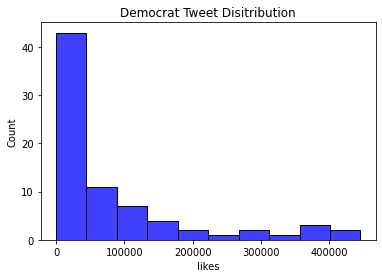

In [70]:
brian = p_senate_merged[~(p_senate_merged.handle == 'brianschatz')]
sns.histplot(brian[brian.party == 0].likes, color ='blue').set(title='Democrat Tweet Disitribution')


[Text(0.5, 1.0, 'Republican Tweet Disitribution')]

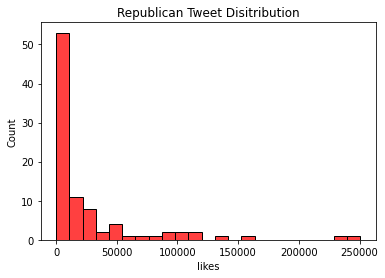

In [67]:
sns.histplot(p_senate_merged[p_senate_merged.party == 1].likes, color = 'red').set(title='Republican Tweet Disitribution')


In [ ]:
print(p_senate_merged[p_senate_merged.party == 0].likes.mean() ) #Average dem likes
print(p_senate_merged[p_senate_merged.party == 1].likes.mean() ) #Average rep likes

111179.76623376623
26579.417582417584


[Text(0.5, 1.0, 'Democrat Tweet Disitribution')]

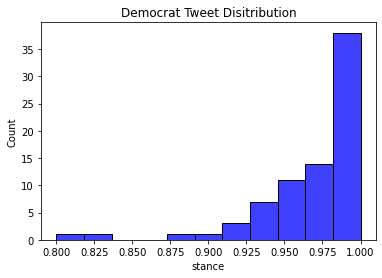

In [64]:
import seaborn as sns
sns.histplot(p_senate_merged[p_senate_merged.party == 0].stance, color ='blue').set(title='Democrat Tweet Disitribution')

[Text(0.5, 1.0, 'Republican Tweet Disitribution')]

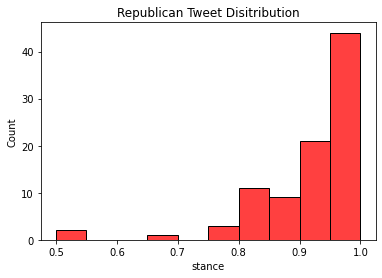

In [65]:
sns.histplot(p_senate_merged[p_senate_merged.party == 1].stance, color = 'red').set(title='Republican Tweet Disitribution')


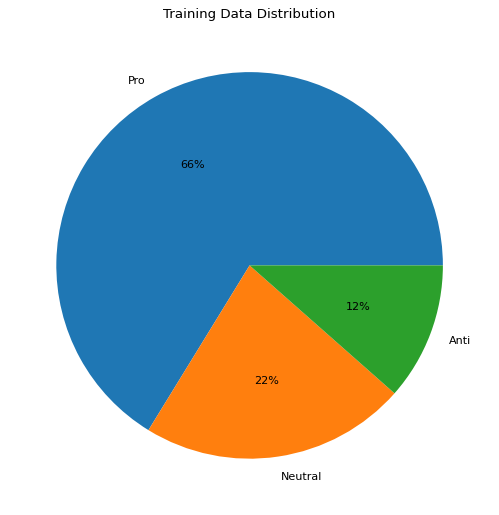

In [ ]:
plt.figure(figsize=(8,8), dpi = 80)
plt.pie(x = ml_df.sentiment.value_counts().values,  labels = ['Pro', 'Neutral', 'Anti'], autopct='%1.0f%%')
plt.title('Training Data Distribution')
plt.show()



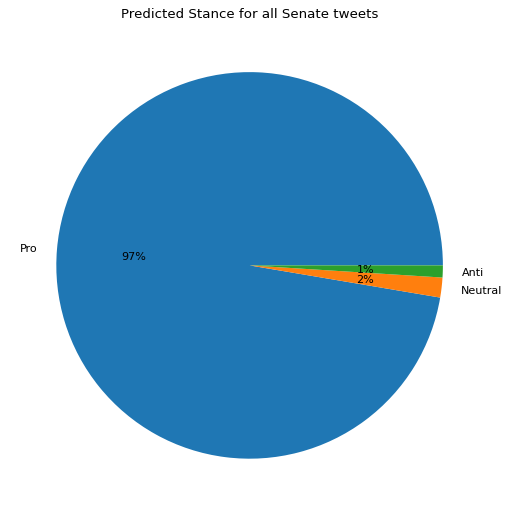

In [ ]:
plt.figure(figsize=(8,8), dpi = 80)
plt.pie(x = info.stance.value_counts().values,  labels = ['Pro', 'Neutral', 'Anti'], autopct='%1.0f%%')
plt.title('Predicted Stance for all Senate tweets')
plt.show()

In [ ]:
print(p_senate_merged[p_senate_merged.party == 0].likes.sum() ) #Average dem likes
print(p_senate_merged[p_senate_merged.party == 1].likes.sum() )

8560842.0
2418727.0


In [ ]:
total_likes = p_senate_merged[p_senate_merged.party == 0].likes.sum() + p_senate_merged[p_senate_merged.party == 1].likes.sum()
total_likes

10979569.0

In [ ]:
num_tweets = info.handle.value_counts()

In [ ]:

                      
senate_merged['tweets'] = senate_merged['handle'].map(num_tweets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(senate_merged[senate_merged.party == 0].tweets.sum() ) #Average dem likes
print(senate_merged[senate_merged.party == 1].tweets.sum() )

NameError: ignored